# **Email spam Detection**
Email spam detection system is used to detect email spam using Machine Learning technique called Natural Language Processing and Python,
where we have a data contain a lot of emails by extract important words and then use naive classifier we can detect if this email is spam or not.

### **Libraries**

In [53]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### **Project Pipeline**
For any machine learning project it consist of three main phases as following :-
1. **Scoping :** List the problem description and project goals
2. **The Data :** Load, analyse and prepare the data for training
3. **The Model :** Create and train the model on the data

## **1 | Scoping**
The project problem is that we have a data containing a set of emails and we will use machine learning and nlp techniques in order to determine if this email is spam or not.

## **2 | The Data**
In this phase we will analyze and prepare the data before training by applying varoius steps as following :-
1. Data Loading
2. Data Visualization
3. Data Cleaning
4. Data Splitting

##### **1. Data Loading**
Load the data and show its info and statistics

In [54]:
# Load the data
data = pd.read_csv('dataset/data-en-hi-de-fr.csv')
data.shape

(5572, 5)

In [55]:
# Show data head (first 5 records)
data.head() 

,labels,text,text_hi,text_de,text_fr
0,ham,"Go until jurong point, crazy.. Available only ...","Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...","Gehen Sie bis jurong Punkt, verrückt.. Verfügb...","Allez jusqu'à Jurong point, fou.. Disponible s..."
1,ham,Ok lar... Joking wif u oni...,ओके लामर.... if if uue पर.,Ok Lar... joking wif u oni...,J'ai fait une blague sur le wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...,Freier Eintritt in 2 a wkly comp zum Gewinn FA...,Entrée libre dans 2 a wkly comp pour gagner FA...
3,ham,U dun say so early hor... U c already then say...,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...,U dun sagen so früh... U c schon dann sagen...,U dun dit si tôt hor... U c déjà dire alors...
4,ham,"Nah I don't think he goes to usf, he lives aro...","नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...","Nein, ich glaube nicht, dass er zu unsf geht, ...","Non, je ne pense pas qu'il va à usf, il vit da..."


In [56]:
# Show data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   text     5572 non-null   object
 2   text_hi  5572 non-null   object
 3   text_de  5572 non-null   object
 4   text_fr  5572 non-null   object
dtypes: object(5)
memory usage: 217.8+ KB


In [57]:
data.head(10)

,spam,text
0,0,"Allez jusqu'à Jurong point, fou.. Disponible s..."
1,0,J'ai fait une blague sur le wif u oni...
2,1,Entrée libre dans 2 a wkly comp pour gagner FA...
3,0,U dun dit si tôt hor... U c déjà dire alors...
4,0,"Non, je ne pense pas qu'il va à usf, il vit da..."
5,1,FreeMsg Hey il ya ma chérie il a été 3 semaine...
6,0,"Même mon frère n'aime pas me parler, ils me tr..."
7,0,"Conformément à votre demande, 'Melle Melle (Or..."
8,1,WINNER!! En tant que client de réseau apprécié...
9,1,Avez-vous eu votre mobile 11 mois ou plus? U R...


##### **2. Data Visualization**
Visualize data features frequencies to get some insights


Répartition des classes :
spam
0    4825
1     747
Name: count, dtype: int64


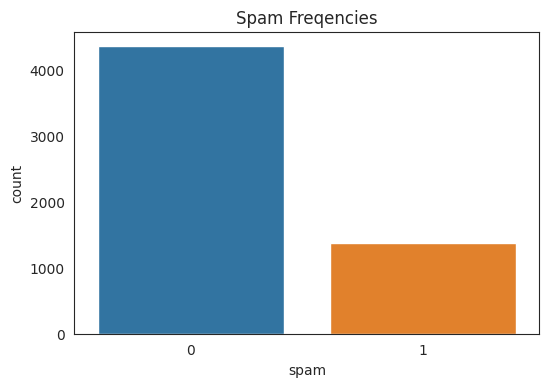

In [ ]:
# Visualize spam  frequenices
print("\nRépartition des classes :")
print(data['spam'].value_counts())
sns.countplot(data=data, x='spam')
plt.title("Répartition des classes (ham vs spam)")
plt.show()

=== STATISTIQUES PAR CLASSE ===

Longueur des messages (caractères) :
       count        mean        std  min    25%    50%     75%    max
spam                                                                 
0     4494.0   77.028260  65.794156  2.0   36.0   55.0   99.00  986.0
1      640.0  156.915625  37.230943  8.0  145.0  166.0  180.25  262.0

Nombre de mots par message :
       count       mean        std  min   25%   50%   75%    max
spam                                                            
0     4494.0  13.892523  11.531753  1.0   7.0  10.0  18.0  184.0
1      640.0  24.859375   6.443609  1.0  22.0  26.0  29.0   41.0


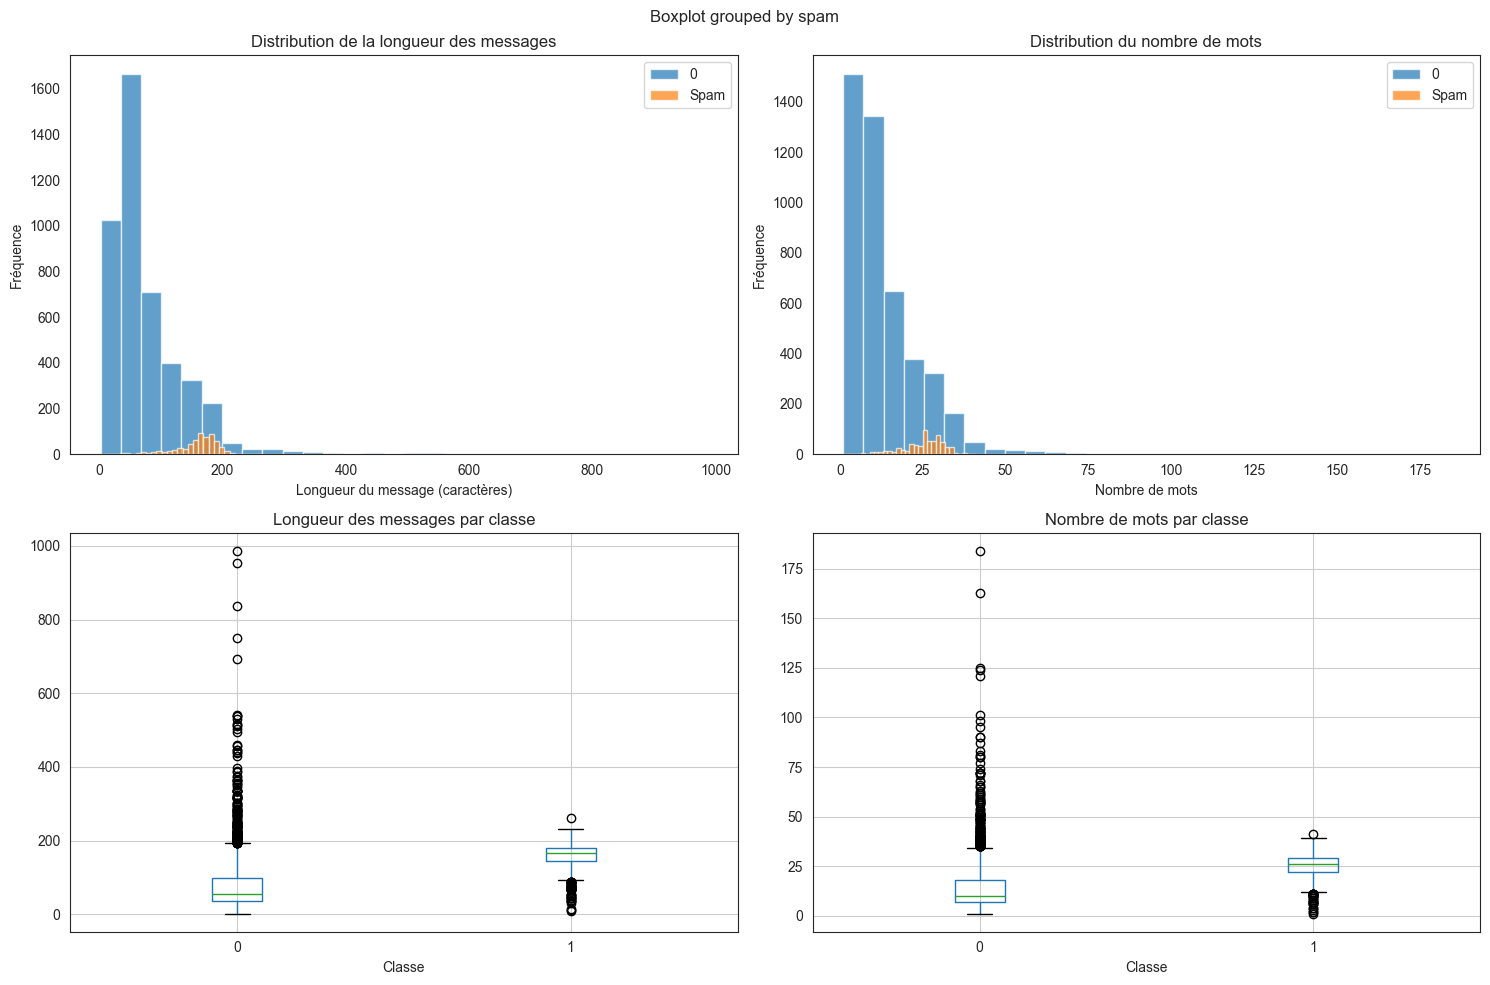


=== MOTS LES PLUS FRÉQUENTS ===

Top 10 mots dans les messages HAM :
de: 1981
je: 1955
que: 1239
à: 1135
pas: 956
la: 949
le: 905
vous: 807
et: 801
un: 665

Top 10 mots dans les messages SPAM :
de: 546
à: 376
pour: 314
vous: 274
le: 225
votre: 223
un: 214
appelez: 170
ou: 151
2: 149


In [70]:
# 3. Analyse exploratoire des données (adapté à labels et text)

import matplotlib.pyplot as plt
from collections import Counter

# Calcul de la longueur des messages
data['message_length'] = data['text'].str.len()
data['word_count'] = data['text'].str.split().str.len()

# Statistiques par classe
print("=== STATISTIQUES PAR CLASSE ===")
print("\nLongueur des messages (caractères) :")
print(data.groupby('spam')['message_length'].describe())

print("\nNombre de mots par message :")
print(data.groupby('spam')['word_count'].describe())

# Visualisations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Distribution de la longueur des messages
axes[0,0].hist(data[data['spam']==0]['message_length'], alpha=0.7, label=0, bins=30)
axes[0,0].hist(data[data['spam']==1]['message_length'], alpha=0.7, label='Spam', bins=30)
axes[0,0].set_xlabel('Longueur du message (caractères)')
axes[0,0].set_ylabel('Fréquence')
axes[0,0].set_title('Distribution de la longueur des messages')
axes[0,0].legend()

# 2. Distribution du nombre de mots
axes[0,1].hist(data[data['spam']==0]['word_count'], alpha=0.7, label=0, bins=30)
axes[0,1].hist(data[data['spam']==1]['word_count'], alpha=0.7, label='Spam', bins=30)
axes[0,1].set_xlabel('Nombre de mots')
axes[0,1].set_ylabel('Fréquence')
axes[0,1].set_title('Distribution du nombre de mots')
axes[0,1].legend()

# 3. Box plot de la longueur
data.boxplot(column='message_length', by='spam', ax=axes[1,0])
axes[1,0].set_title('Longueur des messages par classe')
axes[1,0].set_xlabel('Classe')

# 4. Box plot du nombre de mots
data.boxplot(column='word_count', by='spam', ax=axes[1,1])
axes[1,1].set_title('Nombre de mots par classe')
axes[1,1].set_xlabel('Classe')

plt.tight_layout()
plt.show()

# Analyse des mots les plus fréquents
# Séparer les messages ham et spam
ham_messages = ' '.join(data[data['spam']==0]['text'].tolist())
spam_messages = ' '.join(data[data['spam']==1]['text'].tolist())

# Compter les mots
ham_words = Counter(ham_messages.lower().split())
spam_words = Counter(spam_messages.lower().split())

print("\n=== MOTS LES PLUS FRÉQUENTS ===")
print("\nTop 10 mots dans les messages HAM :")
for word, count in ham_words.most_common(10):
    print(f"{word}: {count}")

print("\nTop 10 mots dans les messages SPAM :")
for word, count in spam_words.most_common(10):
    print(f"{word}: {count}")

##### **3. Data Cleaning**
Handling missing values and check for duplicates 

In [65]:
# Check for missing data for each column 
data.isnull().sum()

spam    0
text    0
dtype: int64

In [66]:
# Check for duplicates and remove them 
data.drop_duplicates(inplace=True)

In [67]:
# Cleaning data from punctuation and stopwords and then tokenizing it into words (tokens)
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('french')]
    return clean

In [ ]:
# Fit the CountVectorizer to data : propre au ripos 
message = CountVectorizer(analyzer=process).fit_transform(data['text'])

KeyboardInterrupt: 

In [11]:
# Save the vectorizer
dump(message, open("models/vectorizer.pkl", "wb"))

In [72]:

french_stopwords = ['le', 'la', 'les', 'de', 'des', 'et', 'en', 'un', 'une', 'dans', 'par', 'pour']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# On utilise la colonne nettoyée si tu en as une, sinon 'text_fr'
# Ici, on suppose que tu utilises 'text_fr'
corpus = data['text']

# Création du vectoriseur TF-IDF avec unigrammes et bigrammes
vectorizer = TfidfVectorizer(ngram_range=(1,2),stop_words=french_stopwords,max_features=3000)

# Transformation des messages en matrice TF-IDF
X = vectorizer.fit_transform(corpus)

# Les labels (cible)
y = data['spam']

print("Matrice TF-IDF shape :", X.shape)
print("Exemple de features :", vectorizer.get_feature_names_out()[:20])

Matrice TF-IDF shape : (5134, 3000)
Exemple de features : ['00' '000' '000 espèces' '02' '03' '03 est' '04' '05' '06' '06 03' '0800'
 '08000839402' '08000839402 ou' '08000930705' '0870' '08712300220'
 '08712300220 citant' '08712460324' '08718720201' '10']


In [75]:
print(vectorizer)

TfidfVectorizer(max_features=3000, ngram_range=(1, 2),
                stop_words=['le', 'la', 'les', 'de', 'des', 'et', 'en', 'un',
                            'une', 'dans', 'par', 'pour'])


##### **4. Data Splitting**
Split the data into training and testing sets

In [12]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(message, data['spam'], test_size=0.20, random_state=0)

## **3. The Model**
In this phase we will create and train a multinomial naive bayes model 

In [13]:
# Model creation
model = MultinomialNB()

In [14]:
# Model training
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [15]:
# Model saving
dump(model, open("models/model.pkl", 'wb'))

In [16]:
# Model predictions on test set
y_pred = model.predict(X_test)

In [17]:
# Model Evaluation | Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

98.63680623174295

In [18]:
# Model Evaluation | Classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       888\n           1       1.00      0.90      0.95       139\n\n    accuracy                           0.99      1027\n   macro avg       0.99      0.95      0.97      1027\nweighted avg       0.99      0.99      0.99      1027\n'

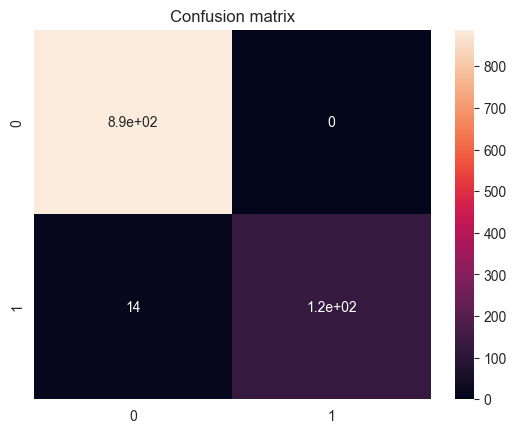

In [19]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Instancier les modèles
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Entraînement
for nom, modele in models.items():
    modele.fit(X_train, y_train)
    print(f"✅ {nom} entraîné avec succès")


✅ Naive Bayes entraîné avec succès
✅ SVM entraîné avec succès
✅ Random Forest entraîné avec succès



📌 Évaluation pour Naive Bayes
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       888
        spam       1.00      0.90      0.95       139

    accuracy                           0.99      1027
   macro avg       0.99      0.95      0.97      1027
weighted avg       0.99      0.99      0.99      1027



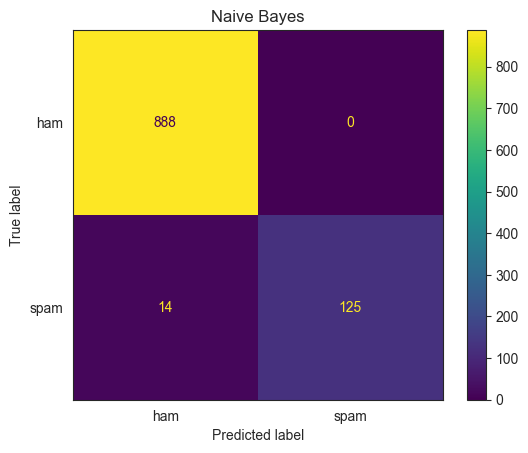


📌 Évaluation pour SVM
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       888
        spam       0.98      0.91      0.94       139

    accuracy                           0.98      1027
   macro avg       0.98      0.95      0.97      1027
weighted avg       0.98      0.98      0.98      1027



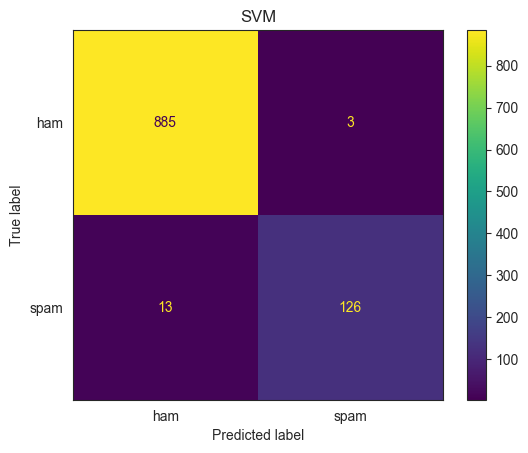


📌 Évaluation pour Random Forest
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       888
        spam       0.98      0.86      0.92       139

    accuracy                           0.98      1027
   macro avg       0.98      0.93      0.95      1027
weighted avg       0.98      0.98      0.98      1027



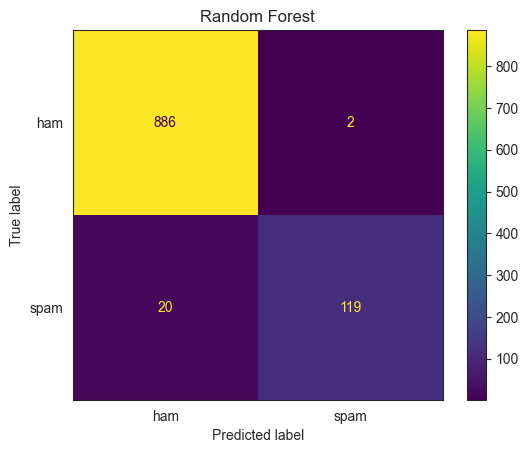

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

for nom, modele in models.items():
    print(f"\n📌 Évaluation pour {nom}")
    y_pred = modele.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=["ham", "spam"]))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["ham", "spam"]).plot()
    plt.title(nom)
    plt.show()


In [88]:
import joblib

joblib.dump(models['Naive Bayes'], 'Naive Bayes_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [89]:
model=models['Naive Bayes']

In [90]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(1027,))

In [91]:
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 12068 stored elements and shape (1027, 3000)>